In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import functools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import AdamW
warnings.filterwarnings('ignore')

%matplotlib inline

# Change to data files or loading all to increate the dataset
- you can the data files to differenct one, the healthy can and should remain the same
- the faulty ones can be loaded with different names and everything should work fine
- in the event that a new file is loaded and the is an issue with the column names, you can change the column names  in the code to reflect what is there in the new file
- the code should work fine with the new data files

- You can also load all the data files and combine them to increase the dataset
- the code should work fine with the new data files
- you just have to duplicate the code for the faulty data files and change the names of the dataframes to reflect the new data files


In [2]:
# data paths
fault_current_ab = './data_files/Faulty Conditions/primary__current_AB.xls'
fault_voltag_ab = './data_files/Faulty Conditions/primary__voltage_AB.xls'

healthy_current_ab = './data_files/No fault conditions(healthy )/primary_current_healthy.xls'
healthy_voltage_ab = './data_files/No fault conditions(healthy )/primary_voltage_healthy.xls'

In [3]:
# load the faulty data
fault_current_ab_df = pd.read_excel(fault_current_ab)
fault_voltage_ab_df = pd.read_excel(fault_voltag_ab)

# load the healthy data
healthy_current_ab_df = pd.read_excel(healthy_current_ab)
healthy_voltage_ab_df = pd.read_excel(healthy_voltage_ab)

In [4]:
# show the first 5 rows of the data
fault_current_ab_df.head()

,time,Ia,Ib,Ic
0,0.0000,0.093038,-3.264580,3.171542
1,0.0001,0.209712,-3.318798,3.109086
2,0.0002,0.326180,-3.369741,3.043562
3,0.0003,0.442321,-3.417357,2.975036
4,0.0004,0.558029,-3.461601,2.903572


In [5]:
# add a new column to the dataframes to indicate the class
# 1 => faulty
# 0 => healthy
fault_current_ab_df['class_current'] = 1
fault_voltage_ab_df['class_voltage'] = 1

healthy_current_ab_df['class_current'] = 0
healthy_voltage_ab_df['class_voltage'] = 0

# show the first 5 rows of the data
healthy_voltage_ab_df.head()

,time,Va,Vb,Vc,Ouput,class_voltage
0,0.0000,-1.035892e-07,-0.866022,0.866022,0.0,0
1,0.0001,3.141053e-02,-0.881300,0.849889,0.0,0
2,0.0002,6.279016e-02,-0.895708,0.832918,0.0,0
3,0.0003,9.410782e-02,-0.909232,0.815124,0.0,0
4,0.0004,1.253326e-01,-0.921859,0.796527,0.0,0


In [6]:
fault_current_ab_df.head()

,time,Ia,Ib,Ic,class_current
0,0.0000,0.093038,-3.264580,3.171542,1
1,0.0001,0.209712,-3.318798,3.109086,1
2,0.0002,0.326180,-3.369741,3.043562,1
3,0.0003,0.442321,-3.417357,2.975036,1
4,0.0004,0.558029,-3.461601,2.903572,1


In [7]:
# drop the time column for every dataframe
fault_current_ab_df.drop('time', axis=1, inplace=True)
fault_voltage_ab_df.drop('time', axis=1, inplace=True)

In [8]:
healthy_current_ab_df.drop('time ', axis=1, inplace=True)
healthy_voltage_ab_df.drop('time', axis=1, inplace=True)

In [9]:
# combine the dataframes
current_ab_df = pd.concat([fault_current_ab_df, healthy_current_ab_df])
voltage_ab_df = pd.concat([fault_voltage_ab_df, healthy_voltage_ab_df])

# show the first 5 rows of the data
current_ab_df.head()

,Ia,Ib,Ic,class_current
0,0.093038,-3.264580,3.171542,1
1,0.209712,-3.318798,3.109086,1
2,0.326180,-3.369741,3.043562,1
3,0.442321,-3.417357,2.975036,1
4,0.558029,-3.461601,2.903572,1


In [10]:
voltage_ab_df.head()

,Va,Vb,Vc,class_voltage,Ouput
0,-0.000930,-7778.141947,7778.142878,1,NaN
1,282.112454,-7915.360621,7633.248167,1,NaN
2,563.947428,-8044.767790,7480.820362,1,NaN
3,845.225853,-8166.235744,7321.009890,1,NaN
4,1125.670143,-8279.644609,7153.974466,1,NaN


In [11]:
# show the first 5 rows of the data
current_ab_df.sample(5)

,Ia,Ib,Ic,class_current
34,0.000222,-0.000211,-0.000012,0
671,0.000194,0.000040,-0.000234,0
677,0.000161,0.000086,-0.000247,0
656,535277.629523,-535275.158075,-2.468513,1
1966,-0.000216,-0.000001,0.000217,0


In [12]:
# drop the Output column of the voltage_ab_df
voltage_ab_df.drop('Ouput', axis=1, inplace=True)

In [13]:
voltage_ab_df.sample(5)

,Va,Vb,Vc,class_voltage
1646,0.992111,-0.604597,-0.387514,0
152,-8963.702499,3993.458450,4970.244048,1
1219,0.562081,-0.997310,0.435229,0
602,-3349.102632,-4131.716976,7480.819646,1
26,0.728966,-0.957316,0.228350,0


In [14]:
# combine the dataframes for voltage and current
data = pd.concat([current_ab_df, voltage_ab_df], axis=1)
data.head()

,Ia,Ib,Ic,class_current,Va,Vb,Vc,class_voltage
0,0.093038,-3.264580,3.171542,1,-0.000930,-7778.141947,7778.142878,1
1,0.209712,-3.318798,3.109086,1,282.112454,-7915.360621,7633.248167,1
2,0.326180,-3.369741,3.043562,1,563.947428,-8044.767790,7480.820362,1
3,0.442321,-3.417357,2.975036,1,845.225853,-8166.235744,7321.009890,1
4,0.558029,-3.461601,2.903572,1,1125.670143,-8279.644609,7153.974466,1


In [15]:
# check for missing values
data.isnull().sum()

Ia               0
Ib               0
Ic               0
class_current    0
Va               0
Vb               0
Vc               0
class_voltage    0
dtype: int64

In [16]:
data.describe()

,Ia,Ib,Ic,class_current,Va,Vb,Vc,class_voltage
count,4002.000000,4002.000000,4002.000000,4002.000000,4.002000e+03,4002.000000,4002.000000,4002.000000
mean,798.197189,-798.204747,0.007540,0.500000,-7.981972e+00,6.038259,1.943713,0.500000
std,193116.351137,193116.311539,1.860061,0.500062,3.952146e+03,3970.876894,4491.834470,0.500062
min,-707068.081825,-707068.035009,-3.716667,0.000000,-8.981425e+03,-8980.933810,-8980.933308,0.000000
25%,-0.000250,-0.000250,-0.000250,0.000000,-9.999959e-01,-32.878062,-0.999941,0.000000
50%,0.000006,0.000001,0.000004,0.500000,-1.035890e-07,-0.010472,0.010472,0.500000
75%,0.065998,0.044706,0.044081,1.000000,9.999959e-01,0.999941,70.788938,1.000000
max,707068.041017,707067.987213,3.787515,1.000000,8.981426e+03,8980.932784,8980.932764,1.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4002 entries, 0 to 2000
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ia             4002 non-null   float64
 1   Ib             4002 non-null   float64
 2   Ic             4002 non-null   float64
 3   class_current  4002 non-null   int64  
 4   Va             4002 non-null   float64
 5   Vb             4002 non-null   float64
 6   Vc             4002 non-null   float64
 7   class_voltage  4002 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 281.4 KB


In [18]:
# if class_voltage = 0 and class_current = 0, we set fault to 0, otherwise 1
data['fault'] = data['class_voltage'] + data['class_current']
data['fault'] = data['fault'].apply(lambda x: 1 if x > 0 else 0)

data.head()

,Ia,Ib,Ic,class_current,Va,Vb,Vc,class_voltage,fault
0,0.093038,-3.264580,3.171542,1,-0.000930,-7778.141947,7778.142878,1,1
1,0.209712,-3.318798,3.109086,1,282.112454,-7915.360621,7633.248167,1,1
2,0.326180,-3.369741,3.043562,1,563.947428,-8044.767790,7480.820362,1,1
3,0.442321,-3.417357,2.975036,1,845.225853,-8166.235744,7321.009890,1,1
4,0.558029,-3.461601,2.903572,1,1125.670143,-8279.644609,7153.974466,1,1


In [19]:
data.sample(5)

,Ia,Ib,Ic,class_current,Va,Vb,Vc,class_voltage,fault
637,702420.844992,-702420.388715,-0.455760,1,1218.570274,-186.271143,-1032.299137,1,1
556,-0.000245,0.000076,0.000168,0,-0.982283,0.328865,0.653418,0,0
534,-0.000222,0.000211,0.000012,0,-0.876303,0.855361,0.020942,0,0
175,-0.000173,-0.000071,0.000243,0,-0.707104,-0.258818,0.965922,0,0
298,0.140464,3.146538,-3.287002,1,563.949285,7480.819332,-8044.768617,1,1


In [20]:
# drop the class_current and class_voltage columns
data.drop(['class_current', 'class_voltage'], axis=1, inplace=True)
data.sample(5)

,Ia,Ib,Ic,Va,Vb,Vc,fault
109,-1.126051,3.630829,-2.504778,-2505.736866,8722.169703,-6216.432837,1
1385,-0.000108,-0.000142,0.000250,-0.453989,-0.544637,0.998625,0
775,-183014.524400,183010.862520,3.657542,-4520.707735,-4154.682126,8675.389905,1
1316,-1.937676,3.782717,-1.845041,-4326.833129,8979.454780,-4652.621651,1
1695,0.000033,0.000198,-0.000231,0.156434,0.777143,-0.933577,0


In [21]:
features = data.drop('fault', axis=1)
target = data['fault']

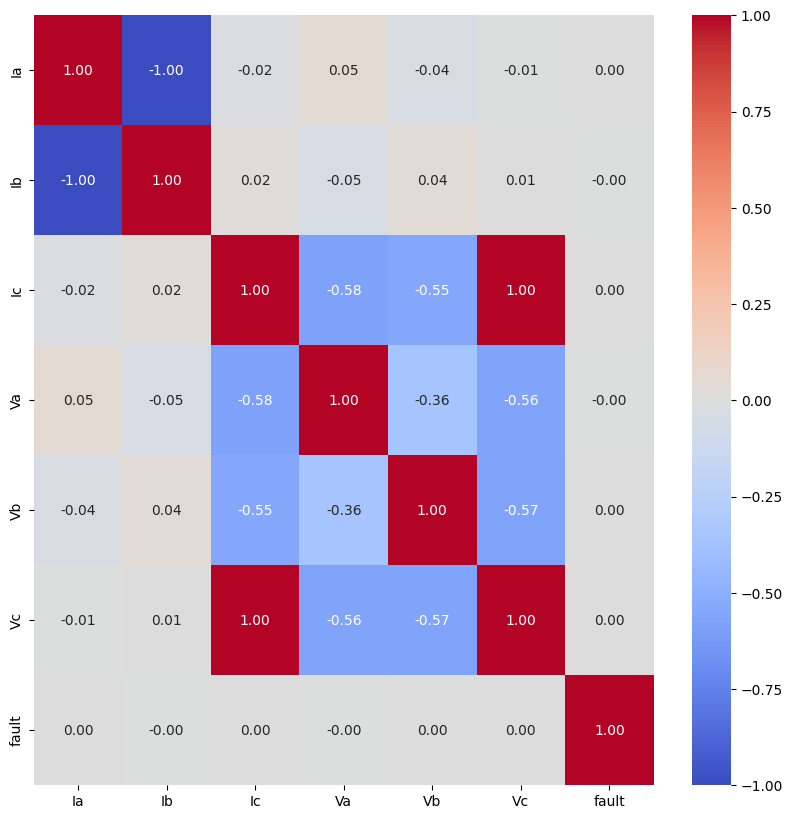

In [22]:
# plot the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [23]:
def split_and_scale(feature):
    X = data.drop([feature],axis=1)
    y = data[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)
    kfold = StratifiedKFold(n_splits=10)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, kfold

def cross_val(classifiers, X_train, y_train, kfold):
    cv_results = []
    for classifier in classifiers.values():
        cv_score = cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4)
        cv_results.append(cv_score)

    cv_means = [i.mean() for i in cv_results]
    cv_std = [i.std() for i in cv_results]
    cv_res = pd.DataFrame({
        "CrossValMeans": cv_means, 
        "CrossValerrors": cv_std, 
        "Algorithm": classifiers.keys()
    })
    return cv_results, cv_means, cv_std, cv_res


def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.3f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.3f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def plot_mean_accuracy(cv_res, cv_std, target):
    _, ax = plt.subplots(figsize=(8, 6))
    g = sns.barplot(ax=ax, data=cv_res, x="CrossValMeans", y="Algorithm", palette="Set3", orient = "h",**{'xerr': cv_std})
    g.set_xlabel("Mean Accuracy")
    g.set_title(target + " Cross validation scores")
    show_values(g, "h", space=0)
    
    
# def model_test(model, parameters, X_train, X_test, y_train, y_test):
#     classifiers[model] = GridSearchCV(classifiers[model], parameters, cv=4, verbose=1, n_jobs=6)
#     start = time.time()
#     classifiers[model].fit(X_train, y_train)
#     stop = time.time()
#     print(f"Training time: {stop - start}s")
#     print(f"Best parameters: {classifiers[model].best_params_}")
#     y_hat = classifiers[model].predict(X_test)
#     cfm = confusion_matrix(y_test, y_hat)
#     print(f'Confusion Matrix: \n{cfm}')
#     print(f'{model}: {accuracy_score(y_hat, y_test)*100 :.2f}%')
    


In [24]:
# split and scale the data
X_train, X_test, y_train, y_test, kfold = split_and_scale('fault')


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2801, 6), (1201, 6), (2801,), (1201,))

In [26]:
y_train.value_counts()

fault
0    1421
1    1380
Name: count, dtype: int64

# Normalize Data

In [27]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# show the shape of the train and test data
X_train.shape, X_test.shape

((2801, 6), (1201, 6))

In [29]:
y_train.shape, y_test.shape

((2801,), (1201,))

In [30]:
y_train.value_counts(), y_test.value_counts()

(fault
 0    1421
 1    1380
 Name: count, dtype: int64,
 fault
 1    621
 0    580
 Name: count, dtype: int64)

In [31]:
len(set(y_train)) # number of output clases

2

In [32]:
# create ANN model with back propagation

# Define the model
# model = Sequential([
#     # First hidden layer with ReLU activation and dropout for regularization
#     Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)),
#     Dropout(rate=0.2),
#     # Second hidden layer with ReLU activation and dropout
#     Dense(units=32, activation="relu"),
#     Dropout(rate=0.2),
#     # Third hidden layer with ReLU activation
#     Dense(units=16, activation="relu"),
#     # Output layer with softmax activation
#     Dense(units=len(set(y_train)), activation="softmax")
# ])

model = Sequential([
    # First hidden layer with ReLU activation and dropout for regularization
    Dense(units=64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(rate=0.2),
    # Second hidden layer with ReLU activation and dropout
    Dense(units=32, activation="relu"),
    Dropout(rate=0.2),
    # Third hidden layer with ReLU activation
    Dense(units=16, activation="relu"),
    # Output layer with softmax activation
    Dense(units=1, activation="sigmoid")  # [0.0056, 0.001] -> 0.0056 -> [1, 0]
])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


In [33]:
# Compile the model with AdamW optimizer
model.compile(loss="binary_crossentropy", optimizer=AdamW(learning_rate=0.001), metrics=["accuracy"])

In [34]:
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=100, # 16000 * 100
    batch_size=32,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6704 - loss: 0.6590 - val_accuracy: 0.9142 - val_loss: 0.4446
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9358 - loss: 0.3624 - val_accuracy: 1.0000 - val_loss: 0.0670
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0818 - val_accuracy: 1.0000 - val_loss: 0.0112
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9992 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 6.3366e-04
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 3.6906e-04
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0047 - val_accuracy: 1.

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.3374e-05
Test Loss: 0.0000, Test Accuracy: 1.0000


In [36]:
predictions = model.predict(X_test)  # Make predictions on training data for evaluation

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [37]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]


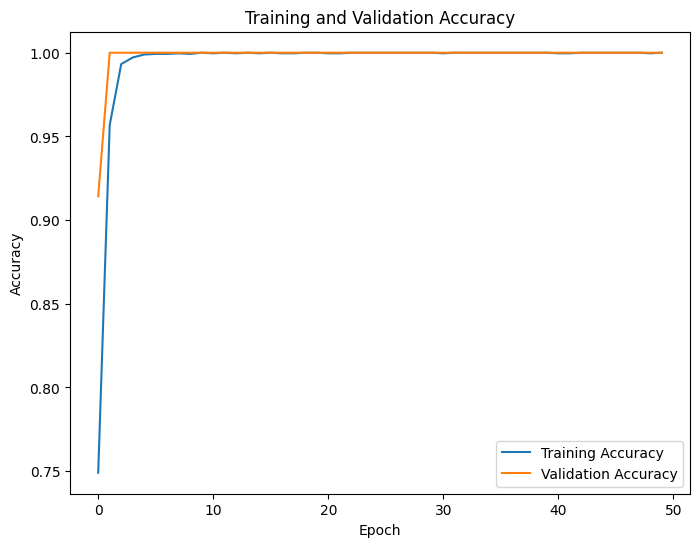

In [38]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(train_acc, label="Training Accuracy")
plt.plot(val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


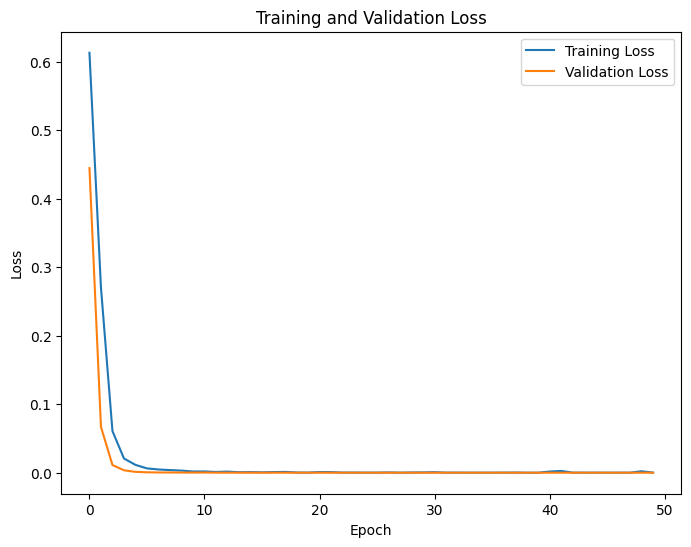

In [39]:
# Plot loss (optional on a separate plot)
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
# Assuming predictions contains probabilities for each class
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability for each sample
predicted_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print or visualize the confusion matrix (using libraries like seaborn)
print(cm)

[[580   0]
 [621   0]]


In [42]:
def plot_confusion_matrix(cm, class_names):
    """
        Plots a confusion matrix with labels and optional normalization.

        Args:
            cm: Confusion matrix (2D numpy array).
            class_names: List of class names (strings).
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # plt.tight_layout()
    plt.show()


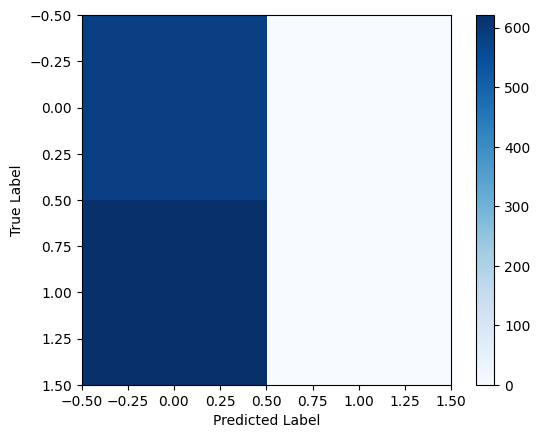

In [43]:
plt.imshow(cm, cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.colorbar()
plt.show()

In [44]:
os.makedirs('./output', exist_ok=True)
model.save('./output/distribution_trainsformer_new_data.keras')

In [45]:
# show a dataframe of the prediction and the actual

y_pred = model.predict(X_test)
cross_check = pd.DataFrame({'Actual': y_test, 'Predicted': np.argmax(y_pred, axis=1)})
cross_check.sample(15)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Actual,Predicted
1202,0,0
803,1,0
1937,0,0
891,0,0
295,1,0
483,0,0
1408,0,0
1816,0,0
1440,0,0
1732,0,0


In [46]:
# check the number of predictions that are correct
cross_check['Correct'] = cross_check['Actual'] == cross_check['Predicted']

In [47]:
cross_check['Correct'].value_counts()

Correct
False    621
True     580
Name: count, dtype: int64